<a href="https://colab.research.google.com/github/colinkearns/DALI-Application/blob/main/dali_challenge_ibpny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!pip install plotly-express

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
# import scikitlearn as sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
df = pd.read_csv("superstore.txt")

df_raw = pd.read_csv("superstore.txt")

df.head

<bound method NDFrame.head of       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
1          2  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
2          3  CA-2016-138688   6/12/2016   6/16/2016    Second Class   
3          4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
4          5  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2014-110422   1/21/2014   1/23/2014    Second Class   
9990    9991  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9991    9992  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9992    9993  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9993    9994  CA-2017-119914    5/4/2017    5/9/2017    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       C

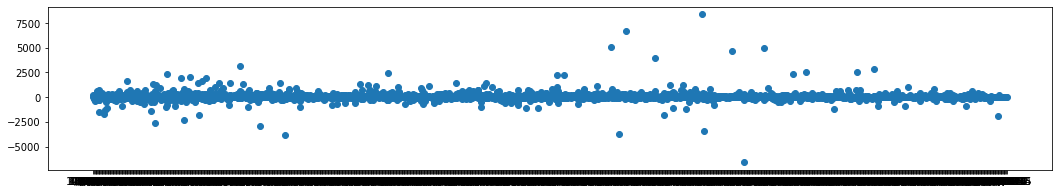

In [22]:
fig,ax = plt.subplots(figsize=(18,3))
ax.plot(df["Order Date"], df["Profit"], "o")



df["Order Date"] = pd.to_datetime(df["Order Date"])

In [56]:
## find gross profit for items as is vs those with discount less than 20% in each sub-category
# gross profit is total of profits for every item in a sub-category


# find regular gross profit
df_cat = df.groupby("Sub-Category")[["Order Date", "Sales", "Quantity", "Profit", "Discount"]].sum()

GPM = np.array(df_cat["Profit"])/np.array(df_cat["Sales"])
df_cat["GPM"] = GPM

print(df_cat)

df_less_discount = df[df["Discount"] <= 0.2]

df_cat_less_discount = df_less_discount.groupby("Sub-Category")[["Order Date", "Sales", "Quantity", "Profit", "Discount"]].sum()

greater_profit = df_cat_less_discount["Profit"]

# find less than 20% gross profit

df_no_discount = df[df["Discount"] == 0.2]

df_cat["Profit Given no Discount over 20%"] = greater_profit

fig = px.bar(df_cat, y=["Profit", "Profit Given no Discount over 20%"], 
             barmode = "group", 
             labels=dict(value="Profit ($)", variable="Discount Specification"))

fig.update_layout(title="Profit given Various Discount Specifications",legend=dict(
    yanchor="bottom",
    y=-1,
    xanchor="left",
    x=-0.01))

fig.show()






                    Sales  Quantity      Profit  Discount       GPM
Sub-Category                                                       
Accessories   167380.3180      2976  41936.6357     60.80  0.250547
Appliances    107532.1610      1729  18138.0054     77.60  0.168675
Art            27118.7920      3000   6527.7870     59.60  0.240711
Binders       203412.7330      5974  30221.7633    567.00  0.148574
Bookcases     114879.9963       868  -3472.5560     48.14 -0.030228
Chairs        328449.1030      2356  26590.1663    105.00  0.080957
Copiers       149528.0300       234  55617.8249     11.00  0.371956
Envelopes      16476.4020       906   6964.1767     20.40  0.422676
Fasteners       3024.2800       914    949.5182     17.80  0.313965
Furnishings    91705.1640      3563  13059.1436    132.40  0.142404
Labels         12486.3120      1400   5546.2540     25.00  0.444187
Machines      189238.6310       440   3384.7569     35.20  0.017886
Paper          78479.2060      5178  34053.5693 

In [24]:
# find discount vs. profit for each sub-category

fig = px.scatter(df, x="Discount", y="Profit", color="Sub-Category")

fig.update_layout(title_text = 'Profit (USD) vs. Discount (Percentage Off) at Superstore')

fig.show()

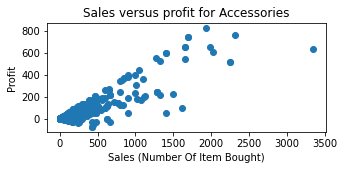

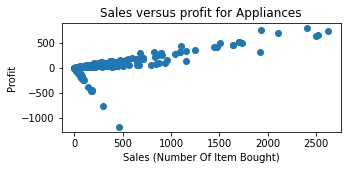

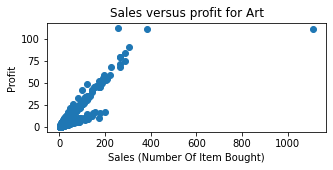

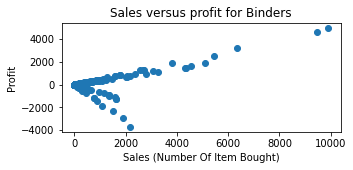

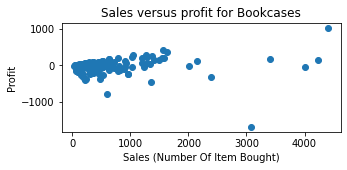

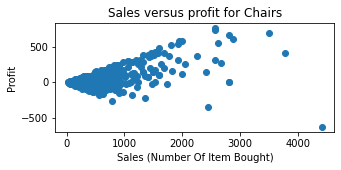

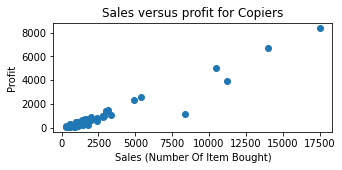

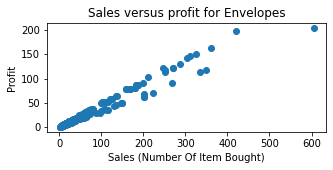

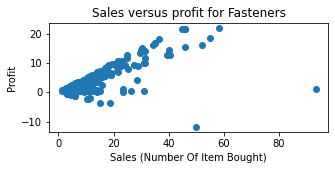

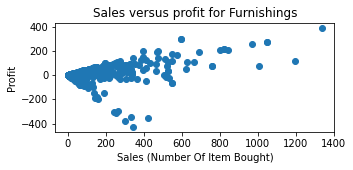

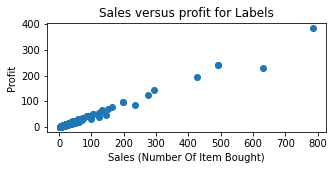

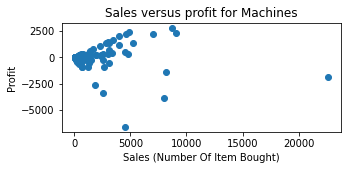

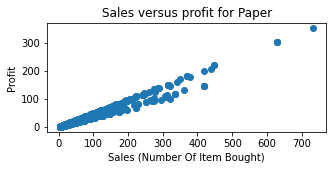

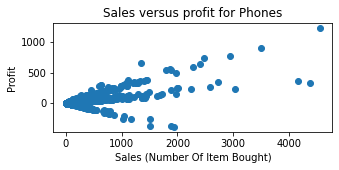

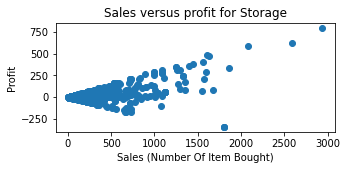

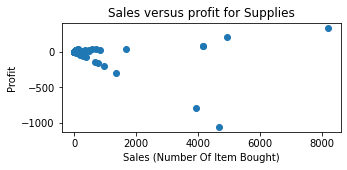

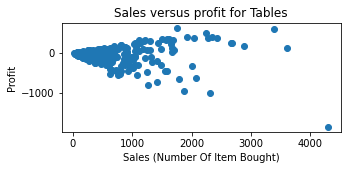

In [25]:
# find sales vs. profit for each sub-category
for cat in df_cat.index:
  fig,ax = plt.subplots(figsize=(5,2))


  ax.plot(df[df["Sub-Category"]==cat]["Sales"], df[df["Sub-Category"]==cat]["Profit"], "o")

  ax.set_title("Sales versus profit for " + cat)

  ax.set_xlabel("Sales (Number Of Item Bought)")
  ax.set_ylabel("Profit")


In [26]:
### taken from https://gist.github.com/rogerallen/1583593

# convert each state into abbreviations

us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [27]:
df["Ship Date"] = pd.to_datetime(df["Ship Date"])
df["Order Date"] = pd.to_datetime(df["Order Date"])

for i in range(df["Ship Date"].size):
  df["Ship Date"][i] = df["Ship Date"][i].dayofyear
  df["Order Date"][i] = df["Order Date"][i].dayofyear

for i in range(df["State"].size):
  df["State"][i] = us_state_to_abbrev[df["State"][i]]

<ipython-input-27-24ba7c2a2524>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-24ba7c2a2524>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-24ba7c2a2524>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
datesandprofit = {} # make a dictionary to hold the dates and profit
dates_and_numorders = {}

for i in range(df["Order Date"].size):
  if datesandprofit.get(df["Order Date"][i]) == None:
    dates_and_numorders[df["Order Date"][i]] = 1
    datesandprofit[df["Order Date"][i]] = df["Profit"][i]
  else:
    dates_and_numorders[df["Order Date"][i]] += 1
    datesandprofit[df["Order Date"][i]] += df["Profit"][i]

print(dates_and_numorders)
print(datesandprofit)

{313: 34, 164: 38, 284: 19, 160: 28, 105: 13, 340: 52, 326: 35, 315: 78, 133: 24, 239: 51, 344: 63, 197: 13, 268: 51, 16: 11, 260: 58, 292: 30, 343: 57, 361: 53, 253: 35, 199: 32, 262: 45, 71: 13, 293: 28, 172: 41, 108: 31, 346: 51, 169: 36, 328: 57, 120: 30, 339: 56, 156: 16, 257: 54, 116: 20, 330: 48, 285: 34, 246: 55, 317: 59, 148: 31, 299: 21, 96: 24, 261: 48, 31: 10, 310: 49, 168: 17, 250: 70, 242: 11, 336: 71, 327: 49, 288: 29, 359: 47, 308: 56, 237: 24, 61: 23, 95: 32, 360: 42, 263: 55, 309: 54, 311: 45, 33: 17, 287: 34, 249: 50, 356: 36, 295: 37, 73: 35, 151: 44, 60: 18, 325: 67, 132: 24, 362: 34, 321: 42, 312: 49, 251: 44, 217: 29, 111: 14, 349: 28, 323: 55, 333: 28, 238: 9, 198: 25, 304: 43, 80: 33, 187: 13, 175: 22, 215: 16, 351: 32, 154: 26, 335: 65, 40: 13, 2: 18, 302: 23, 358: 66, 221: 33, 59: 5, 256: 45, 97: 18, 316: 71, 152: 35, 345: 54, 255: 44, 332: 52, 159: 28, 158: 23, 314: 36, 167: 24, 22: 17, 211: 14, 259: 22, 286: 28, 269: 60, 306: 51, 353: 52, 124: 30, 364: 37, 

Text(0, 0.5, 'Gross Product Margin')

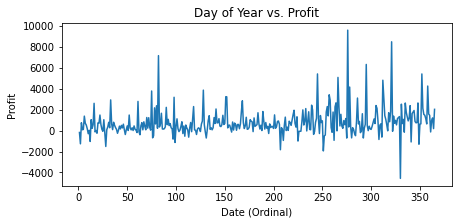

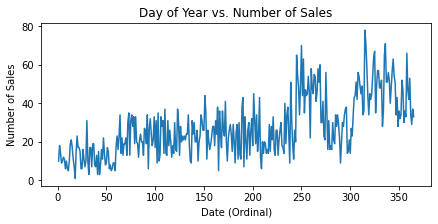

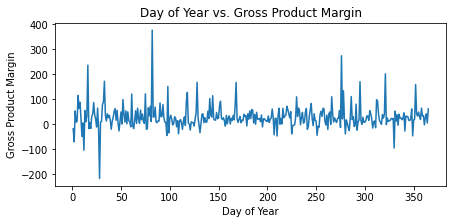

In [31]:
# Plot date against profit for every day in the year

datelist = range(1,366)
profitlist = []
ordernum_list = []

for date in datelist:
  profitlist.append(datesandprofit[date])
  ordernum_list.append(dates_and_numorders[date])
  
profitarray = np.array(profitlist)
ordernumarray = np.array(ordernum_list)

fig,ax = plt.subplots(figsize=(7,3))

ax.set_title("Day of Year vs. Profit")

ax.set_xlabel("Date (Ordinal)")
ax.set_ylabel("Profit")

ax.plot(datelist, profitlist)

fig,bx = plt.subplots(figsize=(7,3))
bx.plot(datelist, ordernum_list)

bx.set_title("Day of Year vs. Number of Sales")

bx.set_xlabel("Date (Ordinal)")
bx.set_ylabel("Number of Sales")

fig,cx = plt.subplots(figsize=(7,3))
cx.plot(datelist, profitarray/ordernumarray)

cx.set_title("Day of Year vs. Gross Product Margin")

cx.set_xlabel("Day of Year")
cx.set_ylabel("Gross Product Margin")

In [ ]:
print(df["State"])

In [32]:
states_to_profit = {}

for i in range(df["State"].size):
  if states_to_profit.get(df["State"][i]) == None:
    states_to_profit[df["State"][i]] = df["Profit"][i]
  else:
    states_to_profit[df["State"][i]] += df["Profit"][i]

In [33]:
## condition data to just include states and other numeric sata

df_states = df.groupby("State")[["Order Date", "Sales", "Quantity", "Profit"]].sum()

# calculate gross profit margin
GPM = np.array(df_states["Profit"])/np.array(df_states["Sales"])

df_states["GPM"] = GPM



In [34]:
# find how much negative revenue orders each sub-category has

df_negrev = df[df["Profit"] < 0]

df_negrev2 = df_negrev.groupby("Sub-Category")["Profit"].count()
df_regcount = df.groupby("Sub-Category")["Profit"].count()

print(df_negrev2)
print(df_regcount)

print(df_negrev2/df_regcount)

print()





Sub-Category
Accessories     91
Appliances      67
Binders        613
Bookcases      109
Chairs         235
Fasteners       12
Furnishings    167
Machines        44
Phones         136
Storage        161
Supplies        33
Tables         203
Name: Profit, dtype: int64
Sub-Category
Accessories     775
Appliances      466
Art             796
Binders        1523
Bookcases       228
Chairs          617
Copiers          68
Envelopes       254
Fasteners       217
Furnishings     957
Labels          364
Machines        115
Paper          1370
Phones          889
Storage         846
Supplies        190
Tables          319
Name: Profit, dtype: int64
Sub-Category
Accessories    0.117419
Appliances     0.143777
Art                 NaN
Binders        0.402495
Bookcases      0.478070
Chairs         0.380875
Copiers             NaN
Envelopes           NaN
Fasteners      0.055300
Furnishings    0.174504
Labels              NaN
Machines       0.382609
Paper               NaN
Phones         0.152981
Sto

In [37]:
## Gross Profit Margin for each state

fig = px.choropleth(df_states,
                    locations=df_states.index, 
                    locationmode="USA-states", 
                    scope="usa",
                    color='GPM',
                    color_continuous_scale="magma", 
                    title = "Gross Profit Margin for Sales in Each US State"
                    )

fig.show()


## Gross Profit for each state



fig = px.choropleth(df_states,
                    locations=df_states.index, 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Profit',
                    color_continuous_scale="magma", 
                    title= "Gross Profit for Sales in Each US State"
                    )
fig.show()

/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



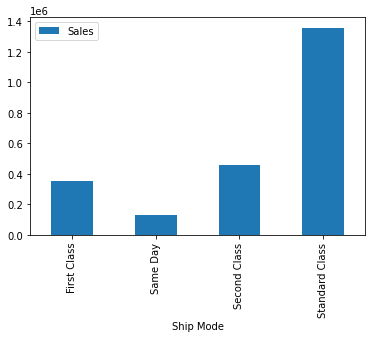

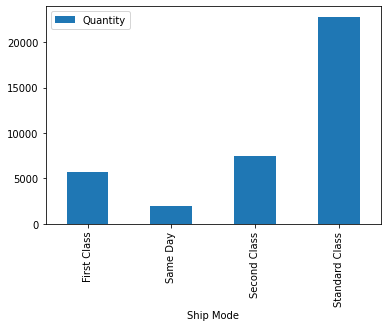

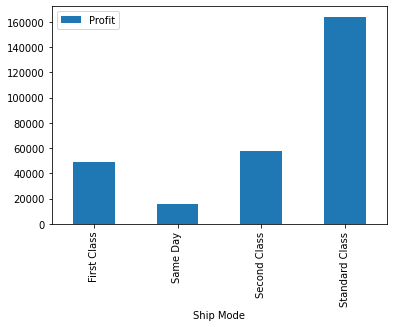

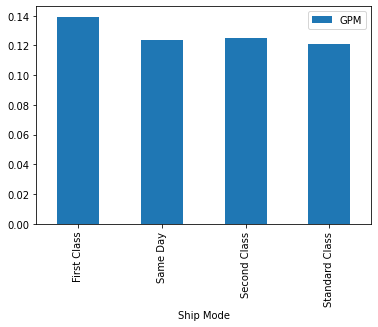

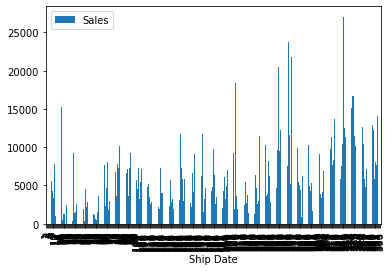

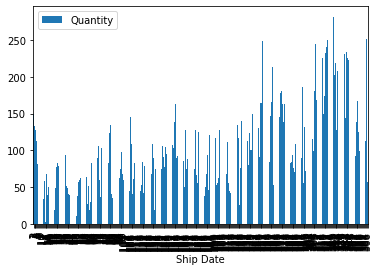

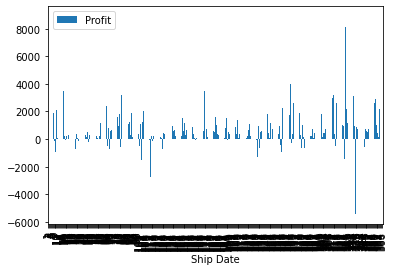

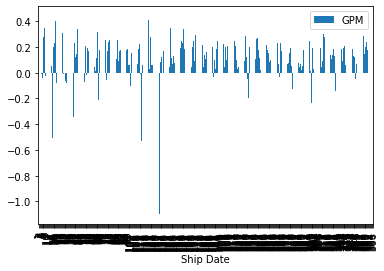

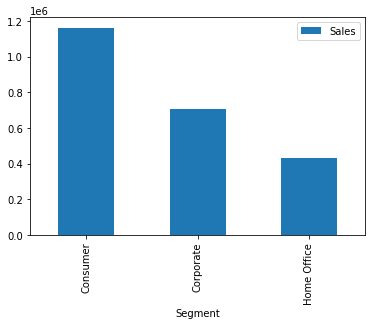

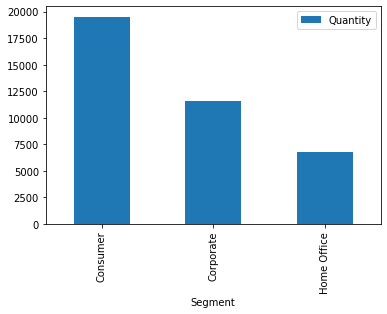

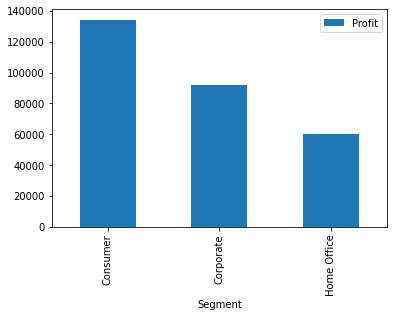

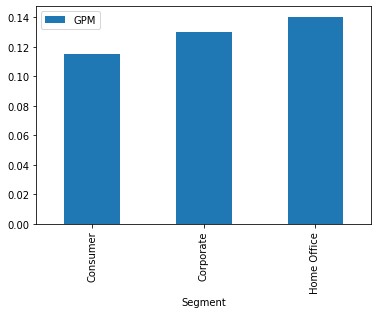

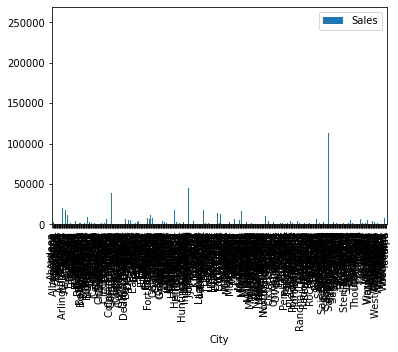

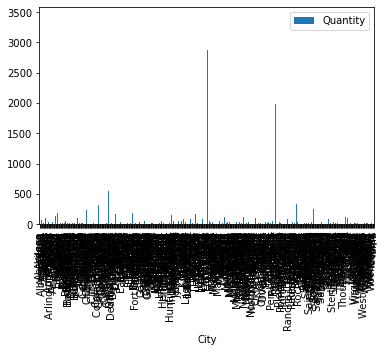

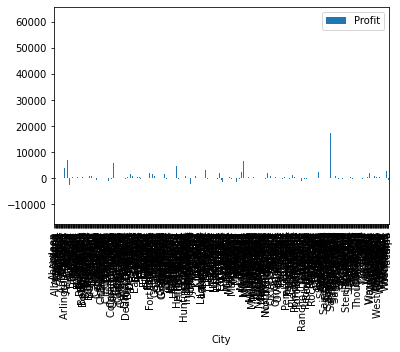

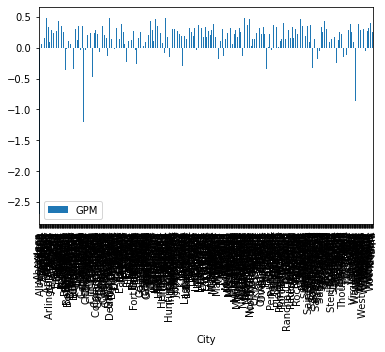

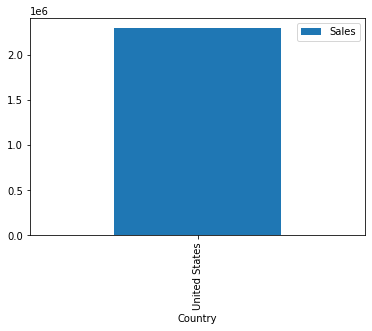

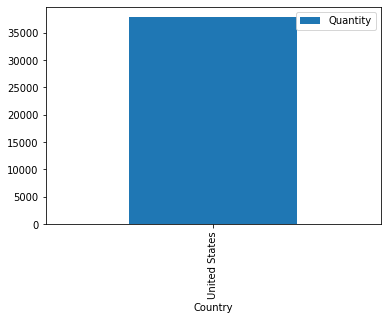

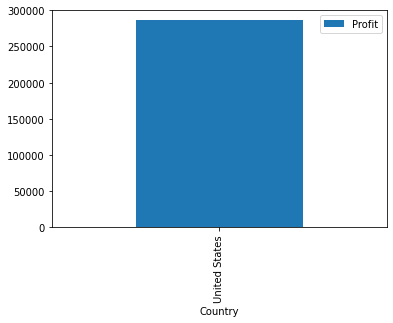

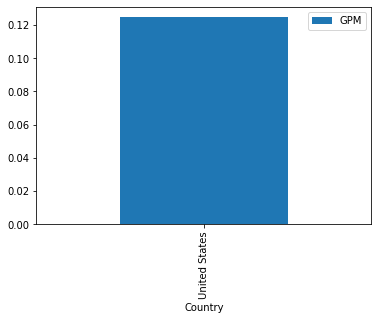

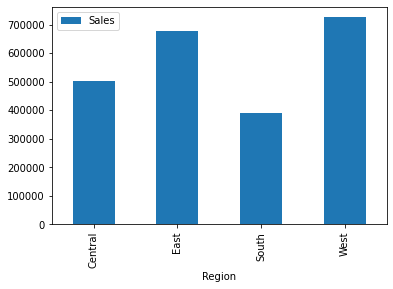

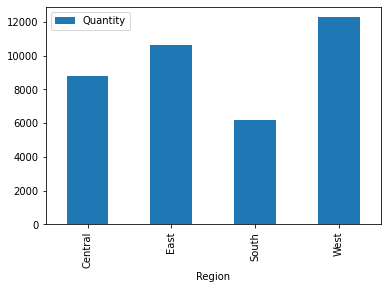

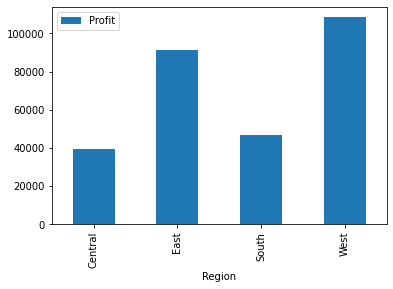

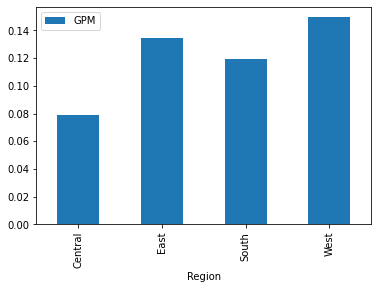

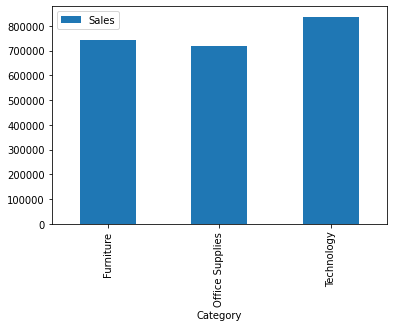

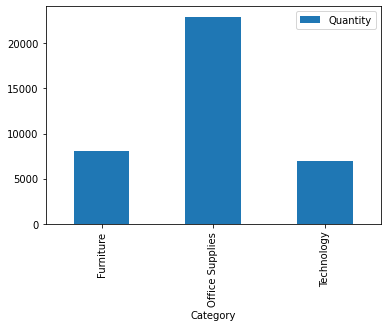

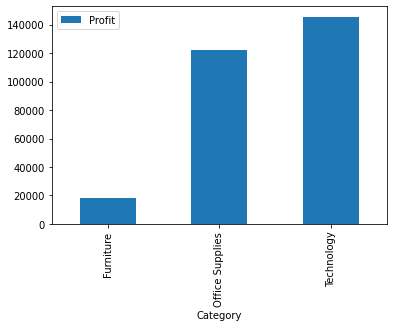

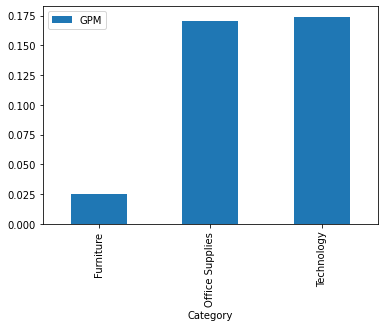

In [38]:
for col in ["Ship Mode", "Ship Date", "Segment", "City", "Country", "Region", "Category"]:
  df_group = df.groupby(col)[["Order Date", "Sales", "Quantity", "Profit", "Discount"]].sum()

  GPM = np.array(df_group["Profit"])/np.array(df_group["Sales"])
  df_group["GPM"] = GPM

  df_group.plot.bar(y="Sales")
  df_group.plot.bar(y="Quantity")
  df_group.plot.bar(y="Profit")
  df_group.plot.bar(y="GPM")



            Discount      Sales  Quantity     Profit
Order Date                                          
1               3.90  1481.8280        56  -181.4109
2               5.40  4417.5700        60 -1263.0547
3               1.92  5950.7716        59   747.8594
4               2.30  1621.7400        41    79.0843
5               1.40   570.7120        33   113.8494
...              ...        ...       ...        ...
362             5.82  6428.3368       131   979.6454
363             2.80  4993.9900       110  1212.5069
364             7.50  7415.4610       132   190.0862
365             4.90  7408.3880       137  2029.8645
366             1.20   731.7680        27    68.2435

[366 rows x 4 columns]
Order Date
330   -4566.0092
251   -1942.8204
207   -1827.8002
28    -1516.8221
349   -1301.0906
         ...    
245    5413.1767
295    6319.8316
82     7160.6544
321    8483.4594
276    9596.5532
Name: Profit, Length: 366, dtype: float64


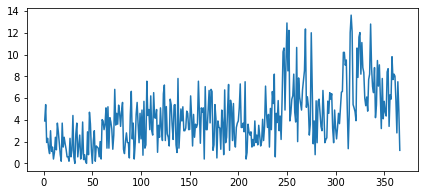

In [39]:
df_discount = df.groupby("Order Date")[["Discount", "Sales", "Quantity", "Profit"]].sum()

print(df_discount)

fig,ax = plt.subplots(figsize=(7,3))
ax.plot(df_discount.index, df_discount["Discount"])

print(df_discount["Profit"].sort_values())

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2697,2698,CA-2014-145317,3/18/2014,3/23/2014,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,32216,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784
6826,6827,CA-2016-118689,10/2/2016,10/9/2016,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,47905,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760
8153,8154,CA-2017-140151,3/23/2017,3/25/2017,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,...,98115,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808
2623,2624,CA-2017-127180,10/22/2017,10/24/2017,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,...,10024,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888
4190,4191,CA-2017-166709,11/17/2017,11/22/2017,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,...,19711,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,2107,US-2014-152723,9/26/2014,9/26/2014,Same Day,HG-14965,Henry Goldwyn,Corporate,United States,Mesquite,...,75150,Central,OFF-BI-10003460,Office Supplies,Binders,Acco 3-Hole Punch,0.876,1,0.8,-1.4016
4711,4712,CA-2014-112403,3/31/2014,3/31/2014,Same Day,JO-15280,Jas O'Carroll,Consumer,United States,Philadelphia,...,19120,East,OFF-BI-10003529,Office Supplies,Binders,Avery Round Ring Poly Binders,0.852,1,0.7,-0.5964
8658,8659,CA-2016-168361,6/21/2016,6/25/2016,Standard Class,KB-16600,Ken Brennan,Corporate,United States,Chicago,...,60623,Central,OFF-BI-10003727,Office Supplies,Binders,Avery Durable Slant Ring Binders With Label Ho...,0.836,1,0.8,-1.3376
9292,9293,CA-2017-124114,3/2/2017,3/2/2017,Same Day,RS-19765,Roland Schwarz,Corporate,United States,Waco,...,76706,Central,OFF-BI-10004022,Office Supplies,Binders,Acco Suede Grain Vinyl Round Ring Binder,0.556,1,0.8,-0.9452


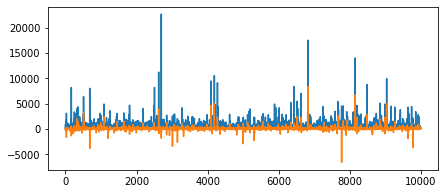

In [40]:
df_raw.groupby("Order Date")[["Discount", "Sales", "Quantity", "Profit"]].sum()

fig,ax = plt.subplots(figsize=(7,3))
ax.plot(df_raw.index, df_raw["Sales"])
ax.plot(df_raw.index, df_raw["Profit"])

df_raw.sort_values("Sales", ascending=False)



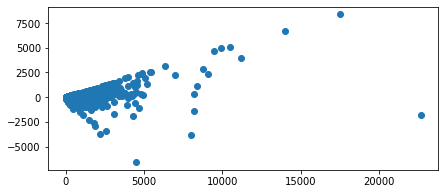

In [41]:
fig,ax = plt.subplots(figsize=(7,3))
ax.plot(df["Sales"], df["Profit"], "o")

In [42]:
print(df[df["Sub-Category"]=="Phones"])

df_phones = df[df["Sub-Category"]=="Phones"]





      Row ID        Order ID Order Date Ship Date       Ship Mode Customer ID  \
7          8  CA-2014-115812        160       165  Standard Class    BH-11710   
11        12  CA-2014-115812        160       165  Standard Class    BH-11710   
19        20  CA-2014-143336        239       244    Second Class    ZD-21925   
35        36  CA-2016-117590        343       345     First Class    GH-14485   
40        41  CA-2015-117415        361       365  Standard Class    SN-20710   
...      ...             ...        ...       ...             ...         ...   
9973    9974  US-2016-103674        341       345  Standard Class    AP-10720   
9976    9977  US-2016-103674        341       345  Standard Class    AP-10720   
9983    9984  US-2016-157728        266       272  Standard Class    RC-19960   
9988    9989  CA-2017-163629        321       325  Standard Class    RA-19885   
9991    9992  CA-2017-121258         57        62  Standard Class    DB-13060   

           Customer Name   

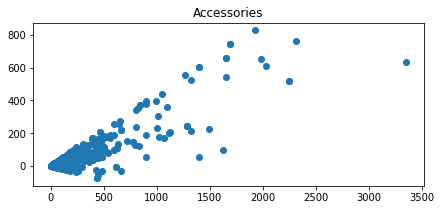

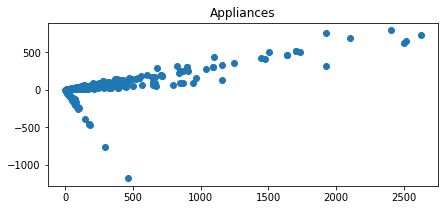

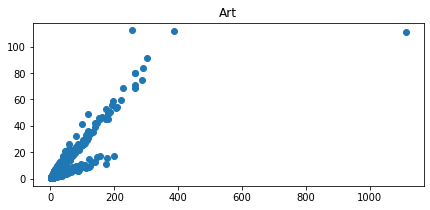

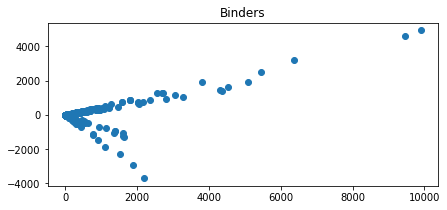

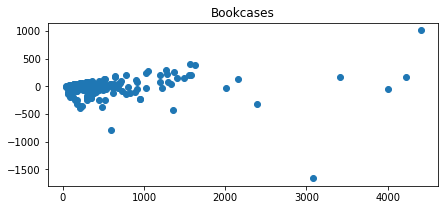

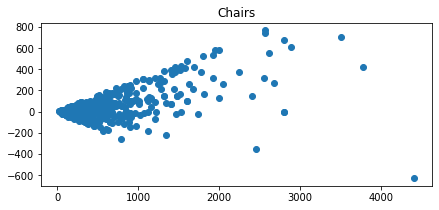

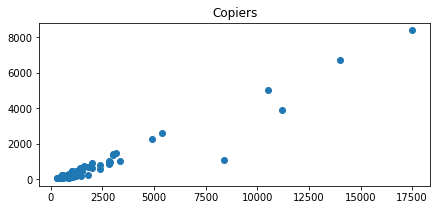

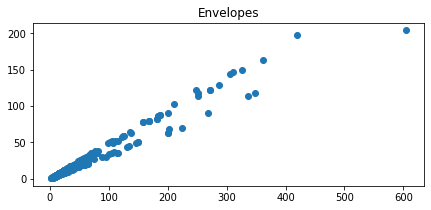

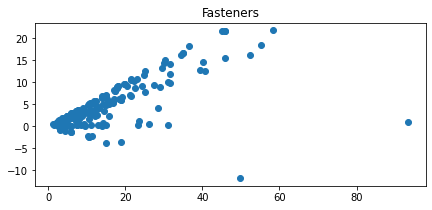

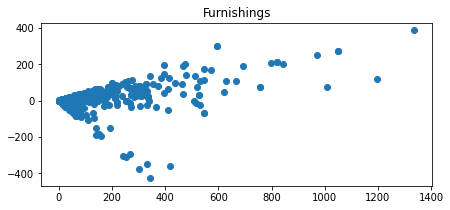

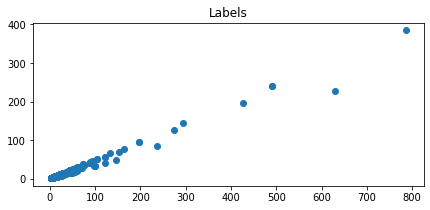

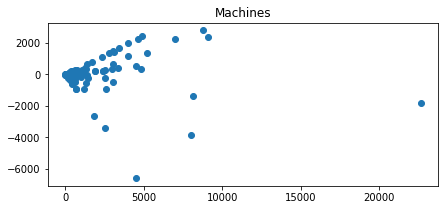

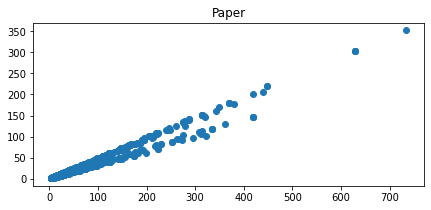

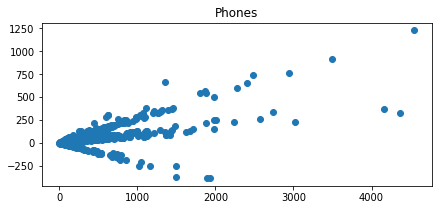

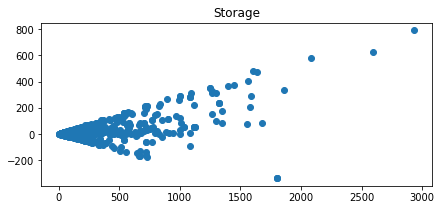

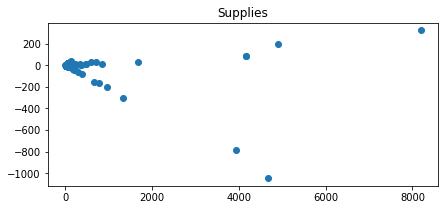

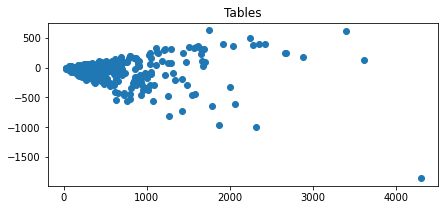

In [43]:
for cat in df_cat.index:
  fig,ax = plt.subplots(figsize=(7,3))
  ax.set_title(cat)
  ax.plot(df[df["Sub-Category"]==cat]["Sales"], df[df["Sub-Category"]==cat]["Profit"], "o")

In [44]:
import statsmodels.api as sm

df = pd.read_csv("superstore.txt")

cat_of_interest = ["Sub-Category", "Ship Mode", "Segment", "State", "Region", "Discount", "Sales", "Quantity", "Profit"]
df2 = df[cat_of_interest]
profit = df2["Profit"]

subcat_dum = pd.get_dummies(df2["Sub-Category"], drop_first = True)
df2 = df2.drop("Sub-Category", axis=1)
shipmode_dum = pd.get_dummies(df2["Ship Mode"], drop_first = True)
df2 = df2.drop("Ship Mode", axis=1)
segment_dum = pd.get_dummies(df2["Segment"], drop_first = True)
df2 = df2.drop("Segment", axis=1)
state_dum = pd.get_dummies(df2["State"], drop_first = True)
df2 = df2.drop("State", axis=1)
region_dum = pd.get_dummies(df2["Region"], drop_first = True)
df2 = df2.drop("Region", axis=1)

df2 = df2.drop("Profit", axis=1)
df2 = df2.drop("Discount", axis=1)
df2 = df2.drop("Quantity", axis=1)

# pd.get_dummies(df["Sub-Category"], drop_first = True)
# pd.get_dummies(df["Ship Mode"], drop_first = True)
# pd.get_dummies(df["Segment"], drop_first = True)
# pd.get_dummies(df["State"], drop_first = True)
# pd.get_dummies(df["Region"], drop_first = True)

df2 = pd.concat([df2, subcat_dum, shipmode_dum, segment_dum, state_dum, region_dum], axis=1)

print(df2)


model = sm.OLS(profit,sm.add_constant(df2))
results = model.fit()
print(results.summary())


# # importing module
# from sklearn.linear_model import LinearRegression
# # creating an object of LinearRegression class
# LR = LinearRegression()
# model = LR.fit(df2, df2["Profit"])



         Sales  Appliances  Art  Binders  Bookcases  Chairs  Copiers  \
0     261.9600           0    0        0          1       0        0   
1     731.9400           0    0        0          0       1        0   
2      14.6200           0    0        0          0       0        0   
3     957.5775           0    0        0          0       0        0   
4      22.3680           0    0        0          0       0        0   
...        ...         ...  ...      ...        ...     ...      ...   
9989   25.2480           0    0        0          0       0        0   
9990   91.9600           0    0        0          0       0        0   
9991  258.5760           0    0        0          0       0        0   
9992   29.6000           0    0        0          0       0        0   
9993  243.1600           1    0        0          0       0        0   

      Envelopes  Fasteners  Furnishings  ...  Utah  Vermont  Virginia  \
0             0          0            0  ...     0        0   

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [45]:
import statsmodels.api as sm

df = pd.read_csv("superstore.txt")

cat_of_interest = ["Sub-Category", "Ship Mode", "Segment", "Discount", "Profit"]
df3 = df[cat_of_interest]

print(df3)


for cat in df_cat.index:

  df_temp = df3[df3["Sub-Category"] == cat]

  profit = df_temp["Profit"]

  shipmode_dum = pd.get_dummies(df_temp["Ship Mode"], drop_first = True)
  df_temp = df_temp.drop("Ship Mode", axis=1)

  segment_dum = pd.get_dummies(df_temp["Segment"], drop_first = True)
  df_temp = df_temp.drop("Segment", axis=1)

  df_temp = df_temp.drop("Sub-Category", axis=1)
  df_temp = df_temp.drop("Profit", axis=1)

  df_temp = pd.concat([df_temp, shipmode_dum, segment_dum], axis=1) 
  print(df_temp)
  print(cat)

  model = sm.OLS(profit,sm.add_constant(df_temp))
  results = model.fit()
  print(results.summary())

     Sub-Category       Ship Mode    Segment  Discount    Profit
0       Bookcases    Second Class   Consumer      0.00   41.9136
1          Chairs    Second Class   Consumer      0.00  219.5820
2          Labels    Second Class  Corporate      0.00    6.8714
3          Tables  Standard Class   Consumer      0.45 -383.0310
4         Storage  Standard Class   Consumer      0.20    2.5164
...           ...             ...        ...       ...       ...
9989  Furnishings    Second Class   Consumer      0.20    4.1028
9990  Furnishings  Standard Class   Consumer      0.00   15.6332
9991       Phones  Standard Class   Consumer      0.20   19.3932
9992        Paper  Standard Class   Consumer      0.00   13.3200
9993   Appliances    Second Class   Consumer      0.00   72.9480

[9994 rows x 5 columns]
      Discount  Same Day  Second Class  Standard Class  Corporate  Home Office
26         0.0         0             1               0          0            0
44         0.0         0             

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     2.190
Date:                Mon, 20 Feb 2023   Prob (F-statistic):             0.0561
Time:                        15:42:38   Log-Likelihood:                -584.86
No. Observations:                  68   AIC:                             1184.
Df Residuals:                      61   BIC:                             1199.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2185.5864    560.485      3.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     23.79
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           4.57e-26
Time:                        15:42:38   Log-Likelihood:                -4860.8
No. Observations:                 846   AIC:                             9736.
Df Residuals:                     839   BIC:                             9769.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             39.9018      7.730      5.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



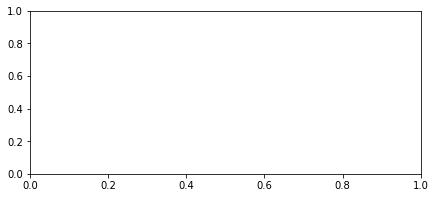

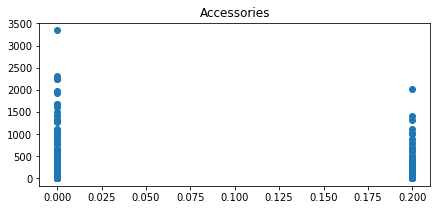

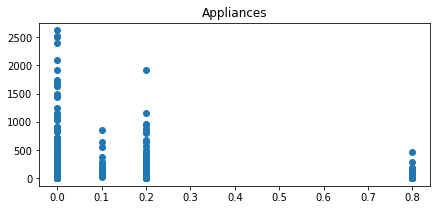

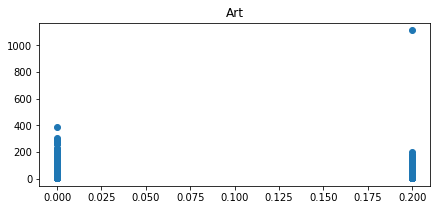

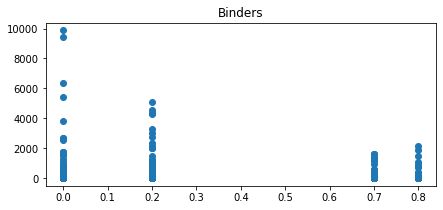

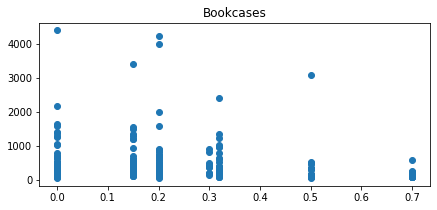

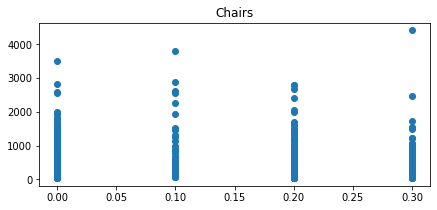

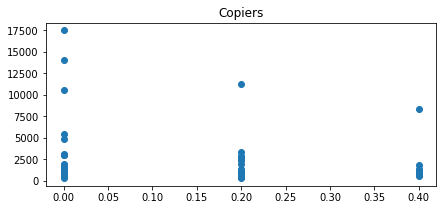

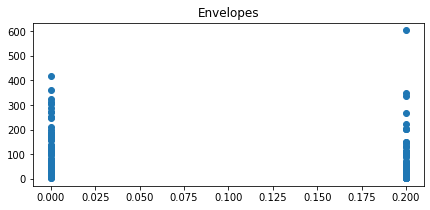

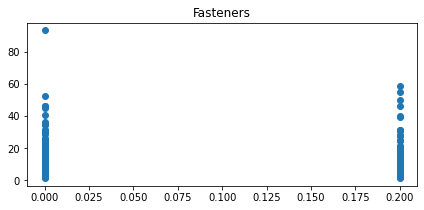

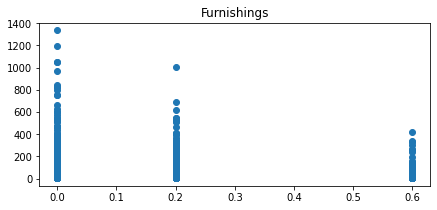

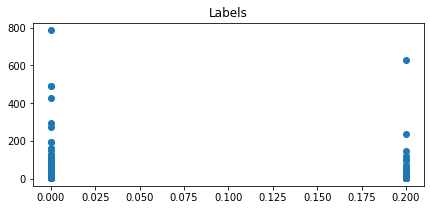

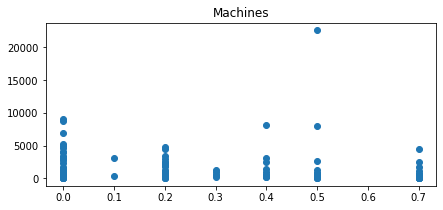

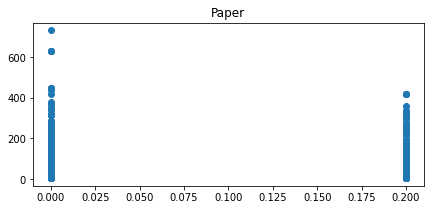

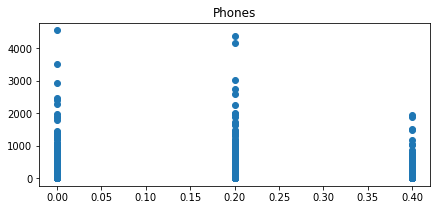

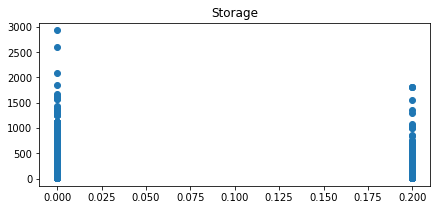

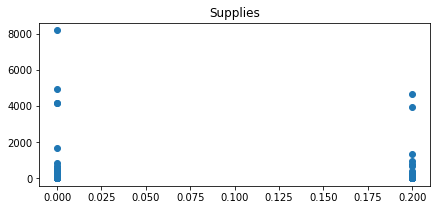

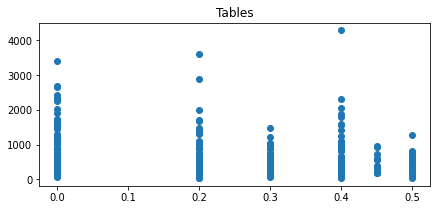

In [46]:
fix, ax = plt.subplots(figsize=(7,3))

# ax.plot(df["Discount"], df["Profit"], "o")

for cat in df_cat.index:
  fig,ax = plt.subplots(figsize=(7,3))
  ax.set_title(cat)
  ax.plot(df[df["Sub-Category"]==cat]["Discount"], df[df["Sub-Category"]==cat]["Sales"], "o")

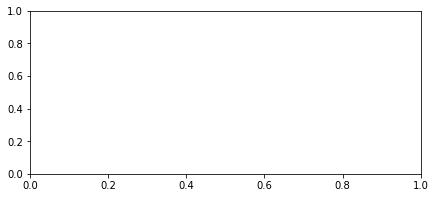

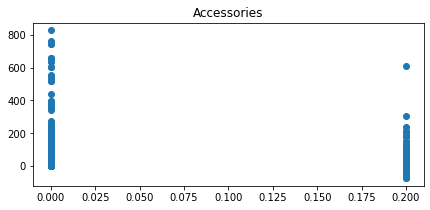

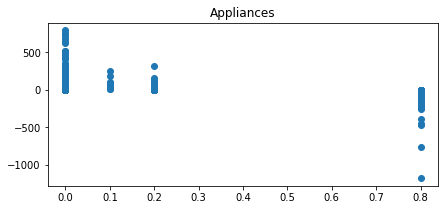

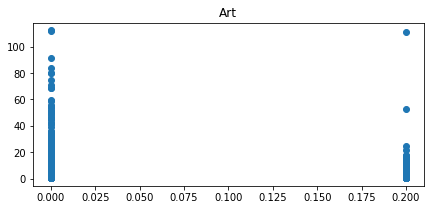

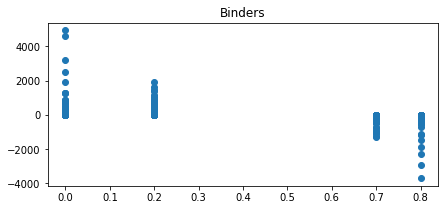

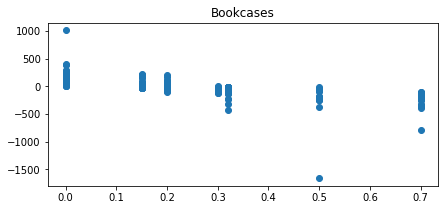

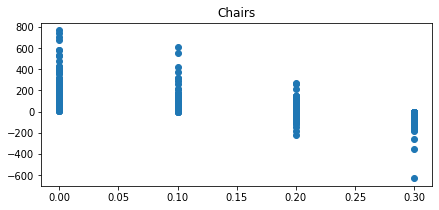

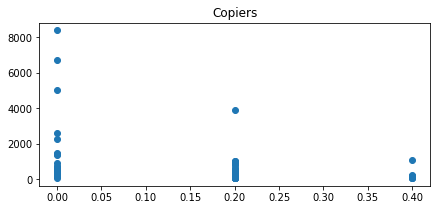

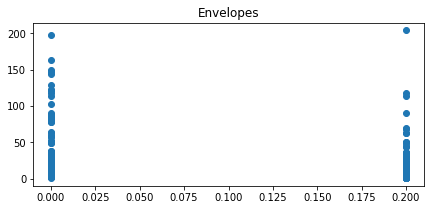

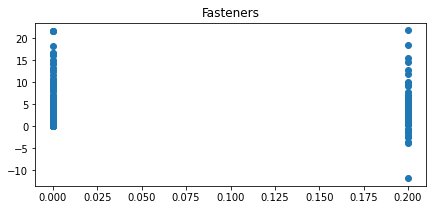

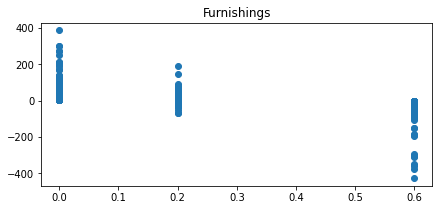

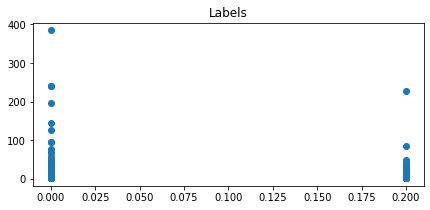

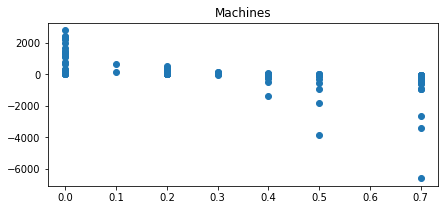

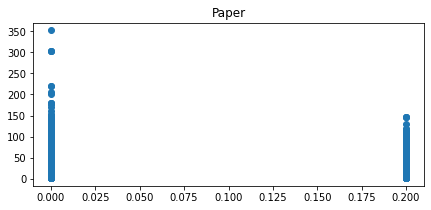

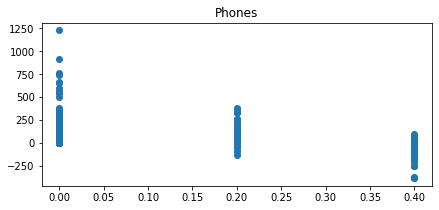

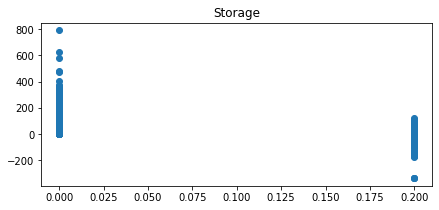

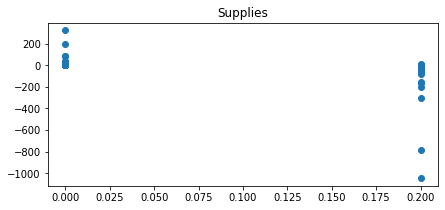

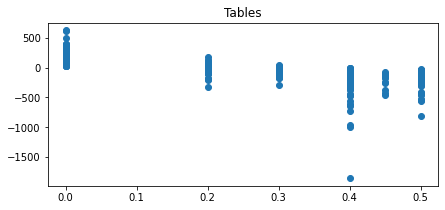

In [47]:
fix, ax = plt.subplots(figsize=(7,3))

# ax.plot(df["Discount"], df["Profit"], "o")

for cat in df_cat.index:
  fig,ax = plt.subplots(figsize=(7,3))
  ax.set_title(cat)
  ax.plot(df[df["Sub-Category"]==cat]["Discount"], df[df["Sub-Category"]==cat]["Profit"], "o")


In [48]:
df = pd.read_csv("superstore.txt")

cat_of_interest = ["Sub-Category","Sales", "Discount", "Profit"]
df4 = df[cat_of_interest]

print(df4)


for cat in df_cat.index:

  print(cat)

  df_temp = df4[df4["Sub-Category"] == cat]

  discount = df_temp["Discount"]
  profit = df_temp["Profit"]
  sales = df_temp["Sales"]

  model = sm.OLS(df_temp["Discount"], sm.add_constant(df_temp["Profit"]))
  results = model.fit()
  print(results.summary())

     Sub-Category     Sales  Discount    Profit
0       Bookcases  261.9600      0.00   41.9136
1          Chairs  731.9400      0.00  219.5820
2          Labels   14.6200      0.00    6.8714
3          Tables  957.5775      0.45 -383.0310
4         Storage   22.3680      0.20    2.5164
...           ...       ...       ...       ...
9989  Furnishings   25.2480      0.20    4.1028
9990  Furnishings   91.9600      0.00   15.6332
9991       Phones  258.5760      0.20   19.3932
9992        Paper   29.6000      0.00   13.3200
9993   Appliances  243.1600      0.00   72.9480

[9994 rows x 4 columns]
Accessories
                            OLS Regression Results                            
Dep. Variable:               Discount   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     49.02
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           5

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/

                            OLS Regression Results                            
Dep. Variable:               Discount   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     273.1
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           3.73e-54
Time:                        15:42:46   Log-Likelihood:                 266.54
No. Observations:                 957   AIC:                            -529.1
Df Residuals:                     955   BIC:                            -519.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1637      0.006     26.740      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.8/

In [58]:
df = pd.read_csv("superstore.txt")

cat_of_interest = ["Sub-Category","Sales", "Discount", "Profit"]
df5 = df[cat_of_interest]


subcat_dum = pd.get_dummies(df5["Sub-Category"], drop_first = True)
df5 = df5.drop("Sub-Category", axis=1)
df5 = pd.concat([df5, subcat_dum], axis=1)


profit = df5["Profit"]

df5 = df5.drop("Profit", axis=1)

model = sm.OLS(profit, sm.add_constant(df5))
results = model.fit()
print(results.summary())




                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     277.7
Date:                Mon, 20 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:00:44   Log-Likelihood:                -66682.
No. Observations:                9994   AIC:                         1.334e+05
Df Residuals:                    9975   BIC:                         1.335e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          35.7447      6.975      5.125      

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

